In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")
df = pd.merge(ride_data, city_data, how="left", on=["city","city"])
df = df.sort_values("date", ascending=True)
df.head(5)

,city,date,fare,ride_id,driver_count,type
800,Liumouth,2018-01-01 00:08:16,37.91,5673666505216,69,Urban
1857,Colemanland,2018-01-01 00:46:46,47.74,2215912677020,23,Suburban
1869,Sotoville,2018-01-01 02:07:24,24.07,7827431948090,10,Suburban
170,Royland,2018-01-01 03:46:50,7.57,5815378003370,64,Urban
1274,West Heidi,2018-01-01 05:23:21,10.75,6571513080673,28,Urban


## Bubble Plot of Ride Sharing Data

In [8]:
average_fair_urban = df[df["type"] =="Urban"].groupby(['city'])["fare"].mean()
total_ride_urban = df[df["type"] == "Urban"].groupby(['city'])["ride_id"].count()
total_driver_urban = df[df["type"] == "Urban"].groupby(['city'])["driver_count"].sum()

average_fair_suburban = df[df["type"] =="Suburban"].groupby(['city'])["fare"].mean()
total_ride_suburban = df[df["type"] == "Suburban"].groupby(['city'])["ride_id"].count()
total_driver_suburban = df[df["type"] == "Suburban"].groupby(['city'])["driver_count"].sum()

average_fair_rural = df[df["type"] =="Rural"].groupby(['city'])["fare"].mean()
total_ride_rural = df[df["type"] == "Rural"].groupby(['city'])["ride_id"].count()
total_driver_rural = df[df["type"] == "Rural"].groupby(['city'])["driver_count"].sum()

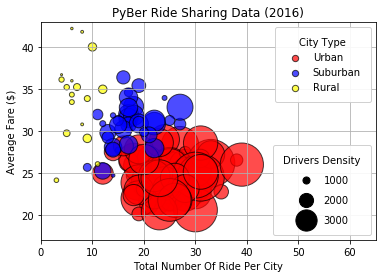

In [9]:
plt.xlim(0,65)
plt.ylim(17,43)
plt.grid(True)
plt.title("PyBer Ride Sharing Data (2016)")
plt.xlabel("Total Number Of Ride Per City")
plt.ylabel("Average Fare ($)")
plt.scatter(total_ride_urban,average_fair_urban, marker="o", facecolors="red", edgecolors="black", s=total_driver_urban, label ="Urban", alpha ="0.7")
plt.scatter(total_ride_suburban,average_fair_suburban, marker="o", facecolors="blue", edgecolors="black", s=total_driver_suburban, label = "Suburban", alpha ="0.7")
plt.scatter(total_ride_rural,average_fair_rural, marker="o", facecolors="yellow", edgecolors="black", s=total_driver_rural, label = "Rural", alpha ="0.7")

# Legend for State colours
lgd = plt.legend(numpoints=1, loc=1, borderpad=1, 
            frameon=True, framealpha=0.9, title="City Type")
for handle in lgd.legendHandles:
    handle.set_sizes([40.0])

# Make a legend for density.
#pws = (pd.cut(total_ride_urban, bins=4, retbins=True)[1]).round(0)
pws = [4,500,1000,2000,3000]
for pw in pws:
    plt.scatter([], [], s=(pw**2)/2e4, c="k",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[5:], l[5:], labelspacing=1, title="Drivers Density", borderpad=1, 
            frameon=True, framealpha=0.9, loc=4, numpoints=1)

plt.gca().add_artist(lgd)
plt.savefig("images/ride_sharing.png")
plt.show()

## Total Fares by City Type

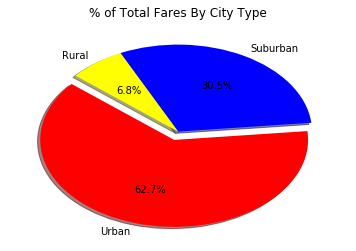

In [10]:
urban_fare = df[df["type"] =="Urban"]["fare"].sum()
suburban_fare = df[df["type"] =="Suburban"]["fare"].sum()
rural_fare = df[df["type"] =="Rural"]["fare"].sum()

plt.title("% of Total Fares By City Type")
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_fare, suburban_fare,rural_fare]
colors = ["red", "blue", "yellow"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("images/fares_by_citytype.png")
plt.show()

## Total Rides by City Type

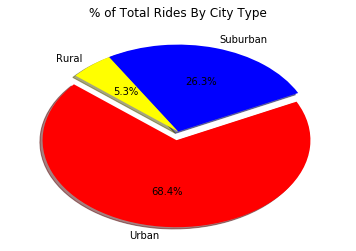

In [11]:
urban_rides = df[df["type"] =="Urban"]["ride_id"].count()
suburban_rides = df[df["type"] =="Suburban"]["ride_id"].count()
rural_rides = df[df["type"] =="Rural"]["ride_id"].count()

plt.title("% of Total Rides By City Type")
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_rides, suburban_rides,rural_rides]
colors = ["red", "blue", "yellow"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("images/rides_by_citytype.png")
plt.show()

## Total Drivers by City Type

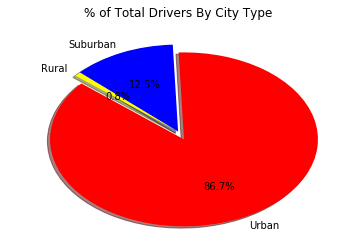

In [13]:
urban_drivers = df[df["type"] =="Urban"]["driver_count"].sum()
suburban_drivers = df[df["type"] =="Suburban"]["driver_count"].sum()
rural_drivers = df[df["type"] =="Rural"]["driver_count"].sum()

plt.title("% of Total Drivers By City Type")
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_drivers, suburban_drivers,rural_drivers]
colors = ["red", "blue", "yellow"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("images/drivers_by_citytype.png")
plt.show()